# Import Libary

In [2]:
from PIL import Image
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

c:\Users\Frederico\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Pre-Processing Dataset

In [3]:
def extract_features(image_path):
    img = Image.open(image_path)
    img = img.resize((64, 64))  # Resize the image to a common size
    img = np.array(img)  # Convert to a NumPy array
    img = img.flatten()  # Flatten the image
    return img

In [4]:
data_dir = "C:/Users/Frederico/Documents/Python Scripts/Machine Learning Practice/dataset"
X = []  # Feature vectors
y = []  # Labels

for class_name in os.listdir(data_dir):
    class_path = os.path.join(data_dir, class_name)
    if os.path.isdir(class_path):
        for image_filename in os.listdir(class_path):
            if image_filename.endswith(".jpg"):
                image_path = os.path.join(class_path, image_filename)
                features = extract_features(image_path)
                X.append(features)
                y.append(class_name)

# Split The dataset

In [41]:
# Split the dataset into training and testing sets with a smaller test set size (e.g., 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [42]:
# Create and train a k-NN classifier
#k = 2  # Number of neighbors
#knn_classifier = KNeighborsClassifier(n_neighbors=k)
#knn_classifier.fit(X_train, y_train)

# ML algorithm used KNN Classification

In [43]:
# Create a k-NN classifier (you can adjust the number of neighbors)
k = 1
knn_classifier = KNeighborsClassifier(n_neighbors=k)

# Train the classifier
knn_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_classifier.predict(X_test)


c:\Users\Frederico\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


# Confussion Matrix

In [44]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy*100:.2f}%")
print(report)


Accuracy: 89.34%
              precision    recall  f1-score   support

      Aquase       0.85      0.95      0.90        56
      Dellos       0.93      0.84      0.89        64
 Le Minerale       0.95      0.87      0.91        68
     Sunkist       0.84      0.93      0.88        56

    accuracy                           0.89       244
   macro avg       0.89      0.90      0.89       244
weighted avg       0.90      0.89      0.89       244



Confusion Matrix
[[53  0  3  0]
 [ 1 54  0  9]
 [ 8  0 59  1]
 [ 0  4  0 52]]


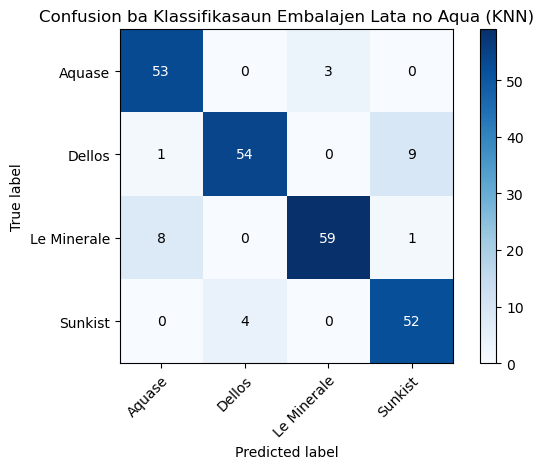

In [45]:
from matplotlib import pyplot as plt

classes = ['Aquase', 'Dellos', 'Le Minerale', 'Sunkist']

def plot_confusion_matrix(y_test, y_pred, classes, 
                          normalize=False, 
                          title=None, 
                          cmap=plt.cm.Blues):
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion Matrix, without normalization'
    
    cm = confusion_matrix(y_test, y_pred)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print('Confusion Matrix')
    
    print(cm)
    
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks
    ax.set(xticks = np.arange(cm.shape[1]),
           yticks = np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels = classes, yticklabels = classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')
    
    # Rotate the tick labels and set their alignment
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", 
             rotation_mode="anchor")
    
    # Loop over data dimensions and create text annotations
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                   ha = "center", va = "center",
                   color = "white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes, 
                      title='Confusion ba Klassifikasaun Embalajen Lata no Aqua (KNN)')
# plt.savefig(r'C:\Users\lenovo\Documents\Materia\SMSTR6\Artificial Intelligence\Projeto Final\Presentations/cm.png')
plt.show()

# Prediction and Classification

In [10]:
# Make predictions on new, unlabeled images
unlabeled_data_dir = "C:/Users/Frederico/Documents/Python Scripts/Machine Learning Practice/train"
predictions = []

for image_filename in os.listdir(unlabeled_data_dir):
    if image_filename.endswith(".jpg") or image_filename.endswith(".jpeg"):
        image_path = os.path.join(unlabeled_data_dir, image_filename)
        features = extract_features(image_path)
        predicted_class = knn_classifier.predict([features])[0]
        predictions.append((image_filename, predicted_class))

# Print the predictions
for image_filename, predicted_class in predictions:
    print(f"Image: {image_filename}, Predicted Class: {predicted_class}")

# SVM Classifier

In [11]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)


# Confusion SVM

In [12]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy*100:.2f}%")
print(report)

Accuracy: 92.62%
              precision    recall  f1-score   support

      Aquase       0.90      0.96      0.93        57
      Dellos       0.95      0.92      0.93        76
 Le Minerale       0.96      0.89      0.92        55
     Sunkist       0.90      0.93      0.91        56

    accuracy                           0.93       244
   macro avg       0.93      0.93      0.93       244
weighted avg       0.93      0.93      0.93       244



Confusion Matrix
[[55  0  2  0]
 [ 0 70  0  6]
 [ 6  0 49  0]
 [ 0  4  0 52]]


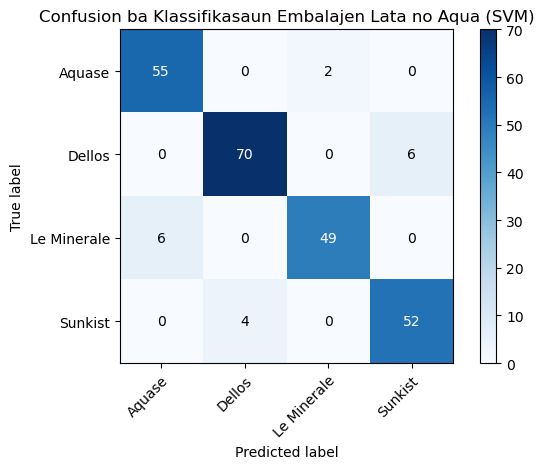

In [13]:
from matplotlib import pyplot as plt

classes = ['Aquase', 'Dellos', 'Le Minerale', 'Sunkist']

def plot_confusion_matrix(y_test, y_pred, classes, 
                          normalize=False, 
                          title=None, 
                          cmap=plt.cm.Blues):
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion Matrix, without normalization'
    
    cm = confusion_matrix(y_test, y_pred)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print('Confusion Matrix')
    
    print(cm)
    
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks
    ax.set(xticks = np.arange(cm.shape[1]),
           yticks = np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels = classes, yticklabels = classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')
    
    # Rotate the tick labels and set their alignment
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", 
             rotation_mode="anchor")
    
    # Loop over data dimensions and create text annotations
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                   ha = "center", va = "center",
                   color = "white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes, 
                      title='Confusion ba Klassifikasaun Embalajen Lata no Aqua (SVM)')
# plt.savefig(r'C:\Users\lenovo\Documents\Materia\SMSTR6\Artificial Intelligence\Projeto Final\Presentations/cm.png')
plt.show()

# Prediction and Classification

In [14]:
# Make predictions on new, unlabeled images
unlabeled_data_dir = "C:/Users/Frederico/Documents/Python Scripts/Machine Learning Practice/train"
predictions = []

for image_filename in os.listdir(unlabeled_data_dir):
    if image_filename.endswith(".jpg") or image_filename.endswith(".jpeg"):
        image_path = os.path.join(unlabeled_data_dir, image_filename)
        features = extract_features(image_path)
        predicted_class = clf.predict([features])[0]
        predictions.append((image_filename, predicted_class))

# Print the predictions
for image_filename, predicted_class in predictions:
    print(f"Image: {image_filename}, Predicted Class: {predicted_class}")

# Naive Baiyes Classifier

In [15]:
# Import library Naive Bayes
from sklearn.naive_bayes import GaussianNB

# Create a Gaussian Naive Bayes Classifier
nb_classifier = GaussianNB()

# Train the model using the training sets
nb_classifier.fit(X_train, y_train)

# Predict the response for the test dataset
y_pred = nb_classifier.predict(X_test)


In [16]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy*100:.2f}%")
print(report)

Accuracy: 71.72%
              precision    recall  f1-score   support

      Aquase       0.67      0.75      0.71        57
      Dellos       0.82      0.64      0.72        76
 Le Minerale       0.78      0.69      0.73        55
     Sunkist       0.63      0.80      0.71        56

    accuracy                           0.72       244
   macro avg       0.72      0.72      0.72       244
weighted avg       0.73      0.72      0.72       244



# Confusion Naive Baiyes

Confusion Matrix
[[43  0 11  3]
 [ 7 49  0 20]
 [14  0 38  3]
 [ 0 11  0 45]]


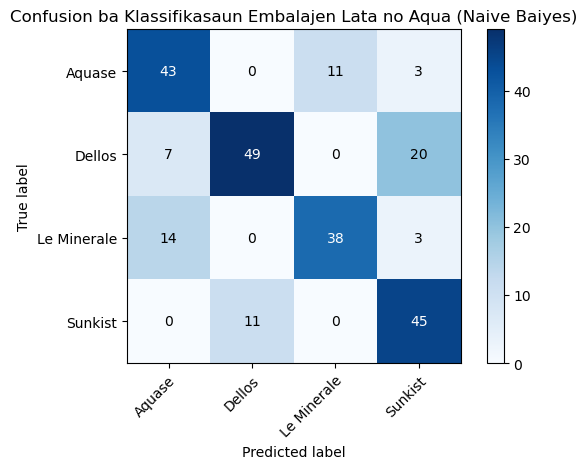

In [17]:
from matplotlib import pyplot as plt

classes = ['Aquase', 'Dellos', 'Le Minerale', 'Sunkist']

def plot_confusion_matrix(y_test, y_pred, classes, 
                          normalize=False, 
                          title=None, 
                          cmap=plt.cm.Blues):
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion Matrix, without normalization'
    
    cm = confusion_matrix(y_test, y_pred)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print('Confusion Matrix')
    
    print(cm)
    
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks
    ax.set(xticks = np.arange(cm.shape[1]),
           yticks = np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels = classes, yticklabels = classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')
    
    # Rotate the tick labels and set their alignment
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", 
             rotation_mode="anchor")
    
    # Loop over data dimensions and create text annotations
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                   ha = "center", va = "center",
                   color = "white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes, 
                      title='Confusion ba Klassifikasaun Embalajen Lata no Aqua (Naive Baiyes)')
# plt.savefig(r'C:\Users\lenovo\Documents\Materia\SMSTR6\Artificial Intelligence\Projeto Final\Presentations/cm.png')
plt.show()

# Decision Tree

In [18]:
# Import Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()

# Train the model using the training sets
dt_classifier.fit(X_train, y_train)

# Predict the response for the test dataset
y_pred = dt_classifier.predict(X_test)


In [19]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy*100:.2f}%")
print(report)

Accuracy: 80.33%
              precision    recall  f1-score   support

      Aquase       0.77      0.77      0.77        57
      Dellos       0.87      0.79      0.83        76
 Le Minerale       0.75      0.75      0.75        55
     Sunkist       0.81      0.91      0.86        56

    accuracy                           0.80       244
   macro avg       0.80      0.80      0.80       244
weighted avg       0.81      0.80      0.80       244



# Confusion Decision Tree

Confusion Matrix
[[44  4  7  2]
 [ 5 60  3  8]
 [ 8  4 41  2]
 [ 0  1  4 51]]


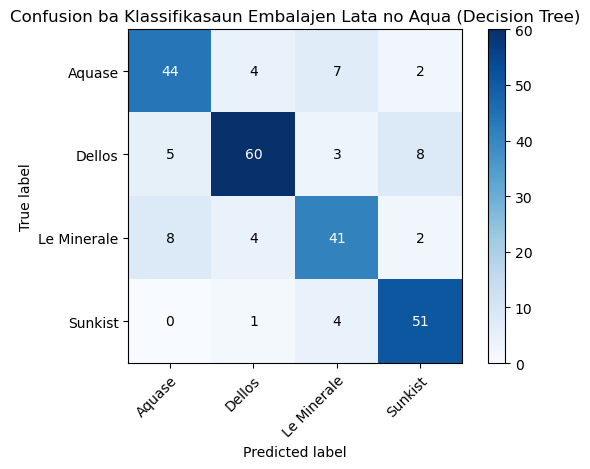

In [20]:
from matplotlib import pyplot as plt

classes = ['Aquase', 'Dellos', 'Le Minerale', 'Sunkist']

def plot_confusion_matrix(y_test, y_pred, classes, 
                          normalize=False, 
                          title=None, 
                          cmap=plt.cm.Blues):
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion Matrix, without normalization'
    
    cm = confusion_matrix(y_test, y_pred)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print('Confusion Matrix')
    
    print(cm)
    
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks
    ax.set(xticks = np.arange(cm.shape[1]),
           yticks = np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels = classes, yticklabels = classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')
    
    # Rotate the tick labels and set their alignment
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", 
             rotation_mode="anchor")
    
    # Loop over data dimensions and create text annotations
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                   ha = "center", va = "center",
                   color = "white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes, 
                      title='Confusion ba Klassifikasaun Embalajen Lata no Aqua (Decision Tree)')
# plt.savefig(r'C:\Users\lenovo\Documents\Materia\SMSTR6\Artificial Intelligence\Projeto Final\Presentations/cm.png')
plt.show()